<a href="https://colab.research.google.com/github/diego2017003/pds_exercicios_unidade1/blob/main/Exercicios3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução
---
Este notebook tem por objetivo responder duas questões propostas na disciplina DCA0445 - Processamento digital de imagens, ministrada pelo professor Agostinho do departamento de computação e automação(DCA) da UFRN, especificamente o tópico três abordado do material da disciplina.

As duas questões em específico tomam como base principal o aprimoramento de uma funcionalidade em openCV na linguagem c++ para contagem e detecção de objetos em uma imagem. o código chamado de labeling pode ser encontrado no repositório do professor pelo seguinte [link](https://agostinhobritojr.github.io/tutorial/pdi/#_exerc%C3%ADcios_2), mas por facilidade do leitor iremos transcrever ele abaixo para aprimorar o entendimento do contexto:

~~~cpp
#include <iostream>
#include <opencv2/opencv.hpp>

using namespace cv;

int main(int argc, char** argv){
  cv::Mat image, realce;
  int width, height;
  int nobjects;

  cv::Point p;
  image = cv::imread(argv[1], cv::IMREAD_GRAYSCALE);

  if(!image.data){
    std::cout << "imagem nao carregou corretamente\n";
    return(-1);
  }

  width=image.cols;
  height=image.rows;
  std::cout << width << "x" << height << std::endl;

  p.x=0;
  p.y=0;

  // busca objetos presentes
  nobjects=0;
  for(int i=0; i<height; i++){
    for(int j=0; j<width; j++){
      if(image.at<uchar>(i,j) == 255){
        // achou um objeto
        nobjects++;
        p.x=j;
        p.y=i;
  		// preenche o objeto com o contador
		  cv::floodFill(image,p,nobjects);
      }
    }
  }
  std::cout << "a figura tem " << nobjects << " bolhas\n";
  cv::equalizeHist(image, realce);
  cv::imshow("image", image);
  cv::imshow("realce", realce);
  cv::imwrite("labeling.png", image);
  cv::waitKey();
  return 0;
}
~~~

o funcionamento do código se dá nos seguintes tópicos principais:
* Abrir a imagem com o openCV e verificar se abertura foi correta;
* criar variáveis de controle para contagem, e para percorrer a imagem;
* detectar sessões onde a imagem é branca como objeto (image.at<uchar>(i,j) == 255)
* contar o objeto e alterar sua cor com o floodfill, para marcar o objeto já encontrado.
* por último, aplicar a equalização de histograma para visualizar os objetos marcados com realce. 

Nos exercícios propostos para aprimorar o código não iremos transcrever o código inteiramente para python e modifica-lo. As respostas irão conter um passo a passo de como resolver essa solução de maneira direta em python. 

Agora, sem mais enrolações. Lhes convido a se juntarem a mim na resolução desses exercícios. Não posso falar por ninguém além de mim, mas a jornada será divertida 🙂

### [Exercício 3.1](https://agostinhobritojr.github.io/tutorial/pdi_exerc%C3%ADcios_2)
---
O exercício, resumidamente , faz o seguinte questionamento:
"E se tivermos mais de 255 objetos? como poderiamos alterar o código para que ele funcionasse neste contexto?" 😰
ou seja, o código originalmente está contando no máximo 255 objetos, por estar lidando com tons de cinza, e a variável que conta o número de objetos ser quem dá a cor para o flood fill que vai marcando os objetos. os tons de cinza vão de 0 a 255, sendo 0 o background da imagem em questão. 

A maneira mais simples para resolver essa situação, são:
* aplicar uma operação de módulo no "nobjects" por 254(o 0 é destinados para o fundo e o 255 para imagens não computadas):
$$
   |\frac{nobjects}{254}|
$$  
As cores vão reiniciar a contagem a cada 255 objetos, mas o número de objetos permanecerá crescendo até preencher o tamanho de um inteiro na memória.
* outra forma seria alterar o tipo da matriz para um tipo maior que unsigned char, entretanto, os valores acima de 255 podem não ter relevância visual apesar da alteração ser computacionalmente válida.

Listadas essas duas possibilidades iremos desenvolver o código para opção 1

#### Passos 0 e 1: instalando o opencv, importando os módulos e abrindo a imagem
---
Esse passos não serão aprofundados por já terem sido abordados nos exercícios 2.1 dessa mesma tarefa. Mas caso o leitor tenha interesse em ler um pouco mis a respeito. os exercícios 2 estão no seguinte [link](https://github.com/diego2017003/pds_exercicios_unidade1/blob/main/Exercicios2.ipynb) deste mesmo repositório.

In [1]:
!pip install opencv-python

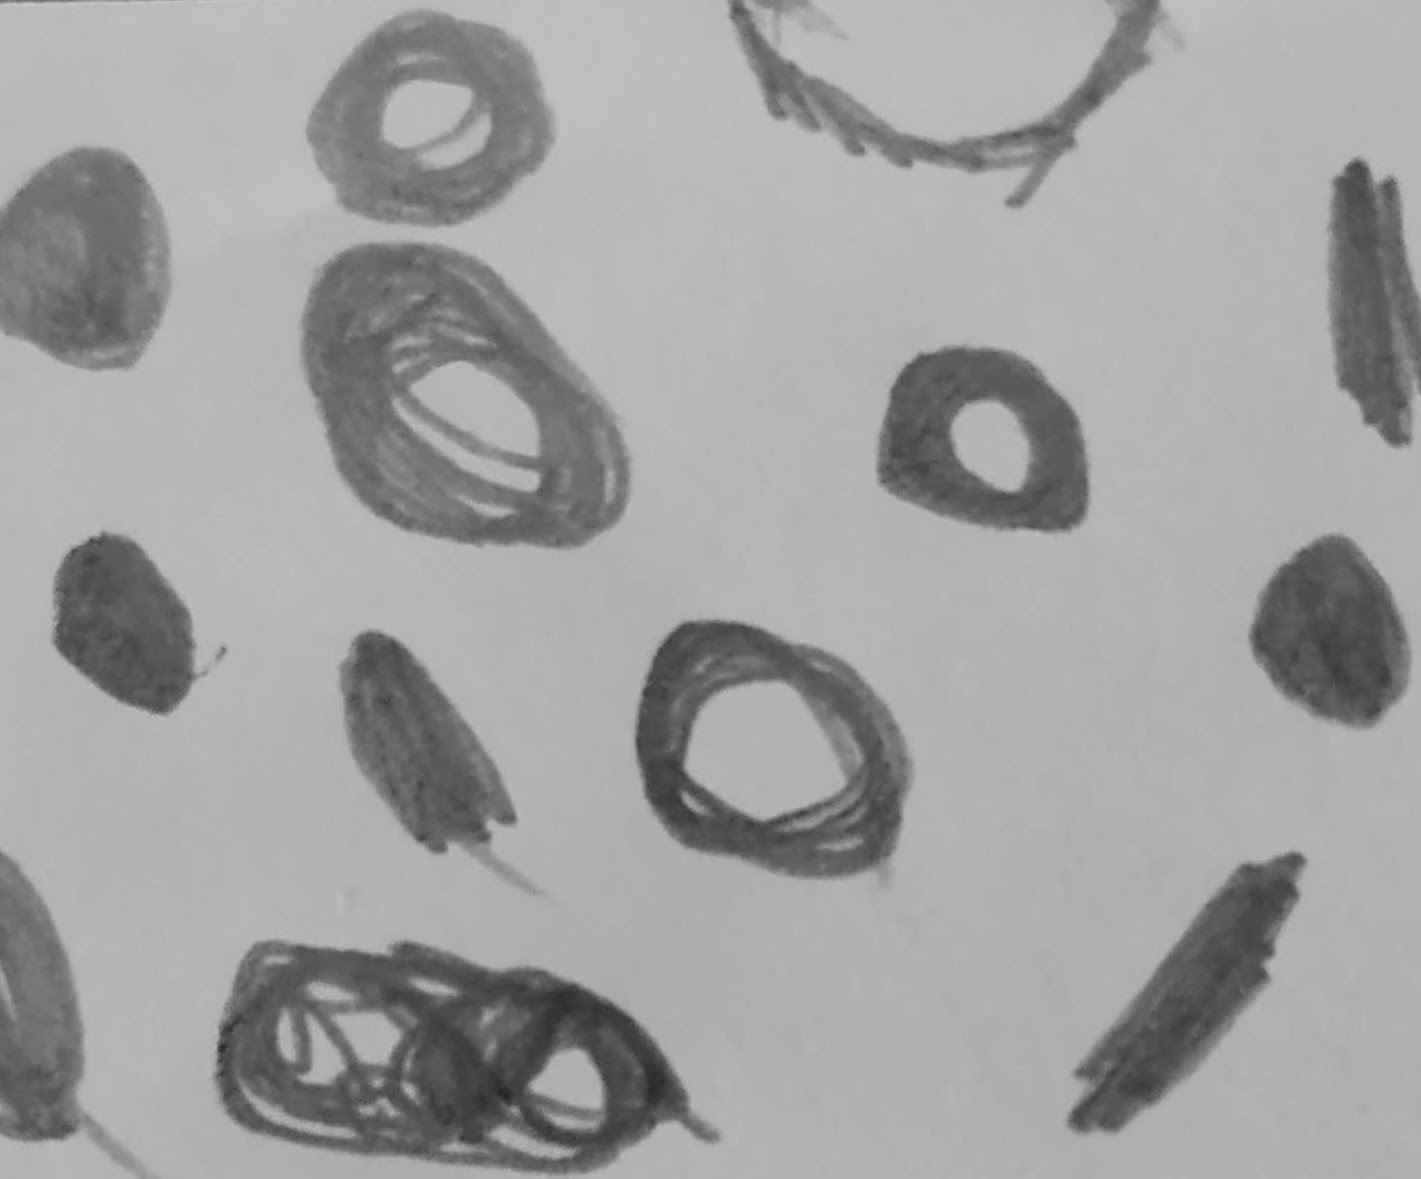

In [2]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

#Abrindo a imagem em tons de cinza
img = cv.imread('/content/bollhas.jpg',cv.IMREAD_GRAYSCALE)
#exibindo a imagem como uma matriz
cv2_imshow(img)



Podemos notar que a imagem está muito diferente do que é passada no exercício, logo. iremos incluir aqui nessa etapa um pré-processamento para torna-la mais compatível. O pré-processamento irá consistir dos seguintes passos:
* aplicação de um blur gaussiano para reduzir o ruído;
* vamos binarizar a imagem com a função cv.threshold(imagem, 127, 255, cv.THRESH_BINARY), a função vai atribuir tudo que está abaixo de 127 a 0 e tudo que estiver acima será atribuído 255
* Por último iremos aplicar o negativo da imagem para os objetos ficarem brancos e o fundo ficar preto.

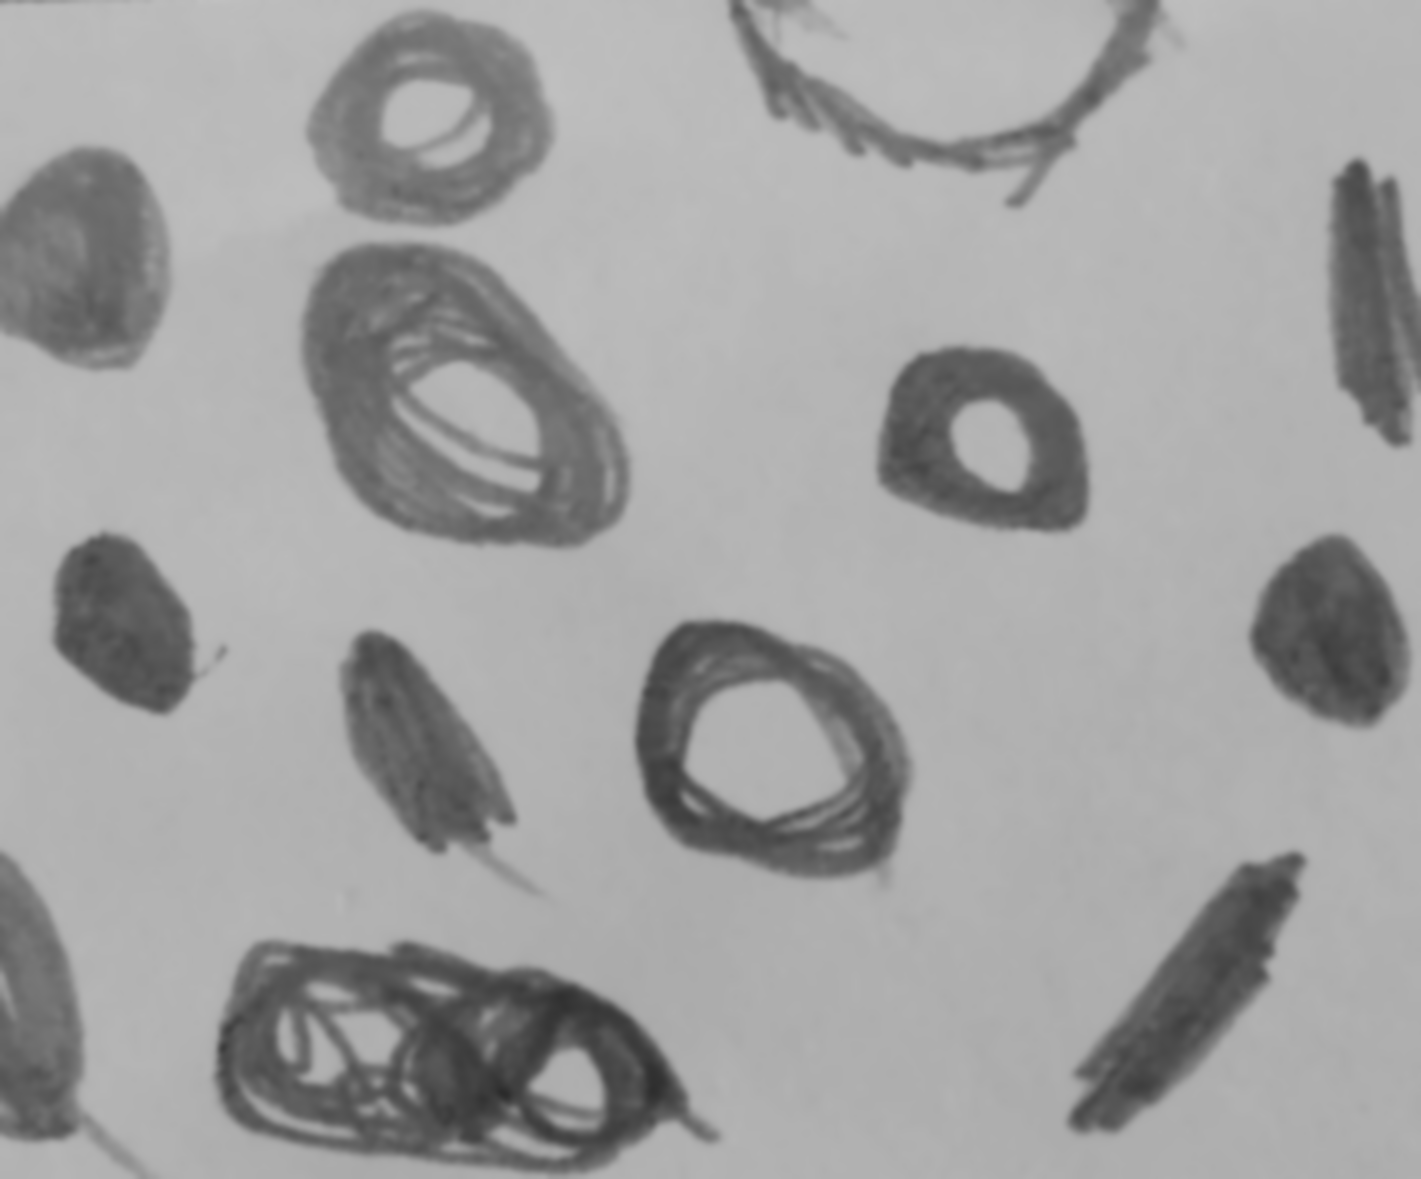

In [3]:
#fazemos uma cópia da imagem
img2 = img.copy()
# aplicamos um kernel de tamanho 15X15, com o valor do desvio padrão em x sendo 0 e em y também por consequência
img3 = cv.GaussianBlur(img2,(15,15),0)	
cv2_imshow(img3)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255   0

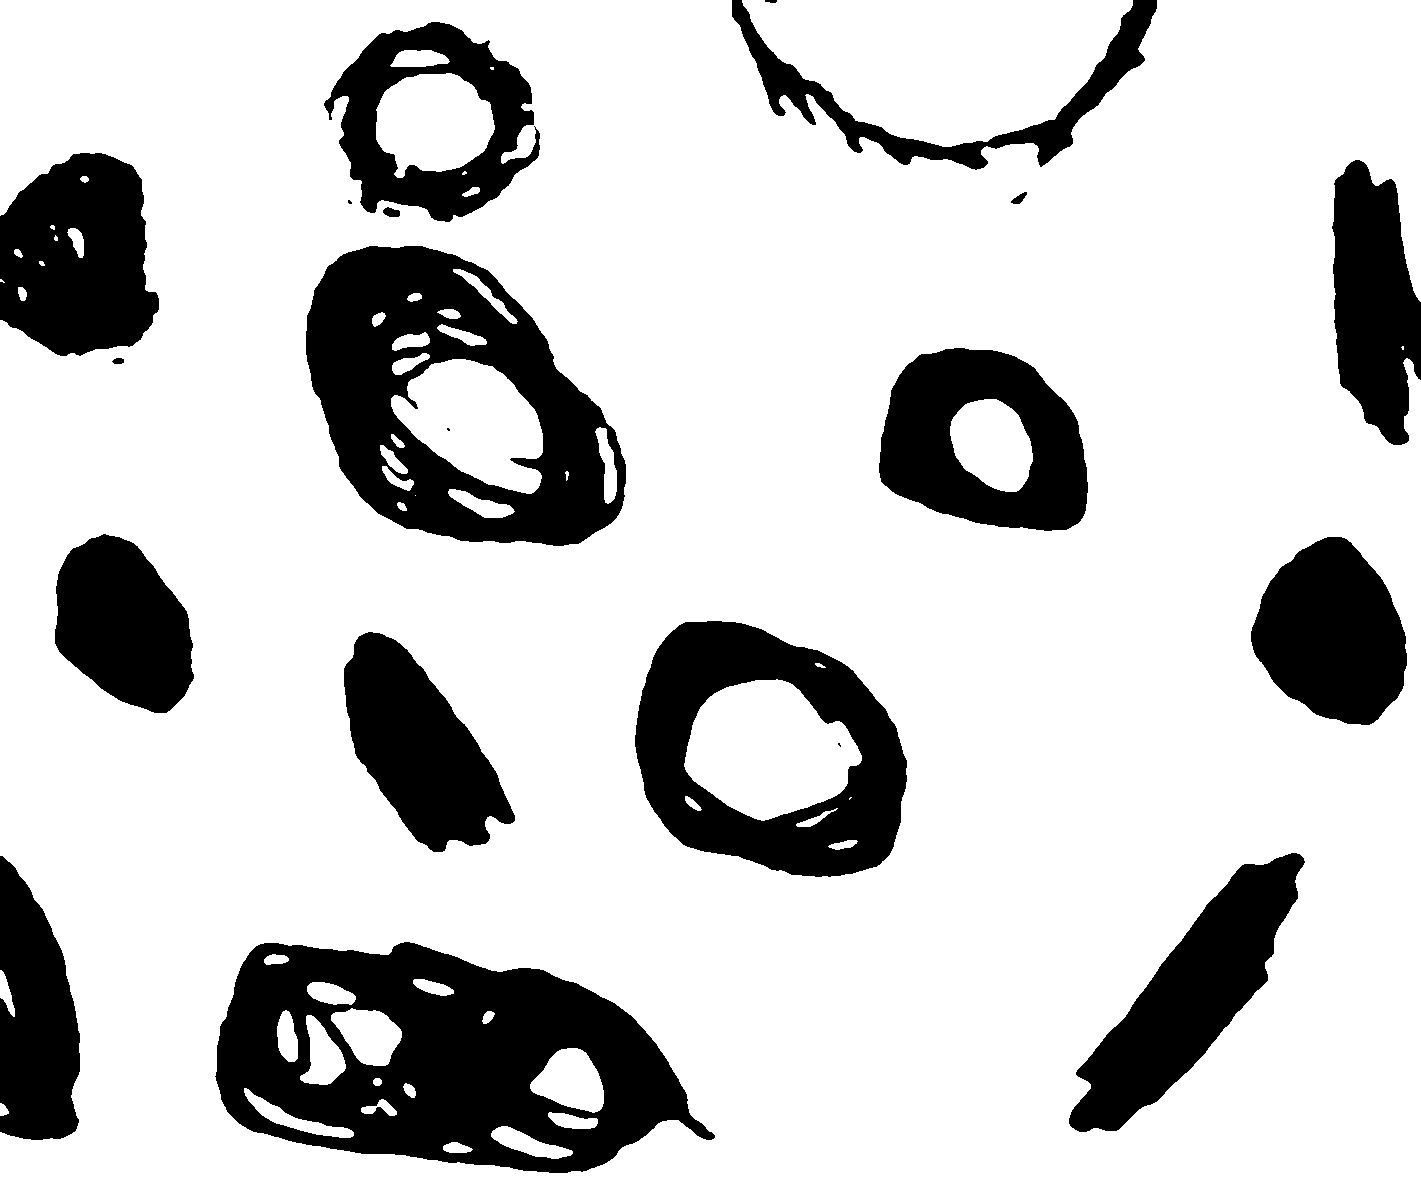

In [4]:
#aplicamos o threshold para binarizar a imagem em 0 e 255 
(thresh, blackAndWhiteimg) = cv.threshold(img3, 127, 255, cv.THRESH_BINARY)
#exibindo uma amostra de objeto que encosta na margem da figura
print(blackAndWhiteimg[200:220,:18])
#exibindo a imagem em preto e branco
cv2_imshow(blackAndWhiteimg)

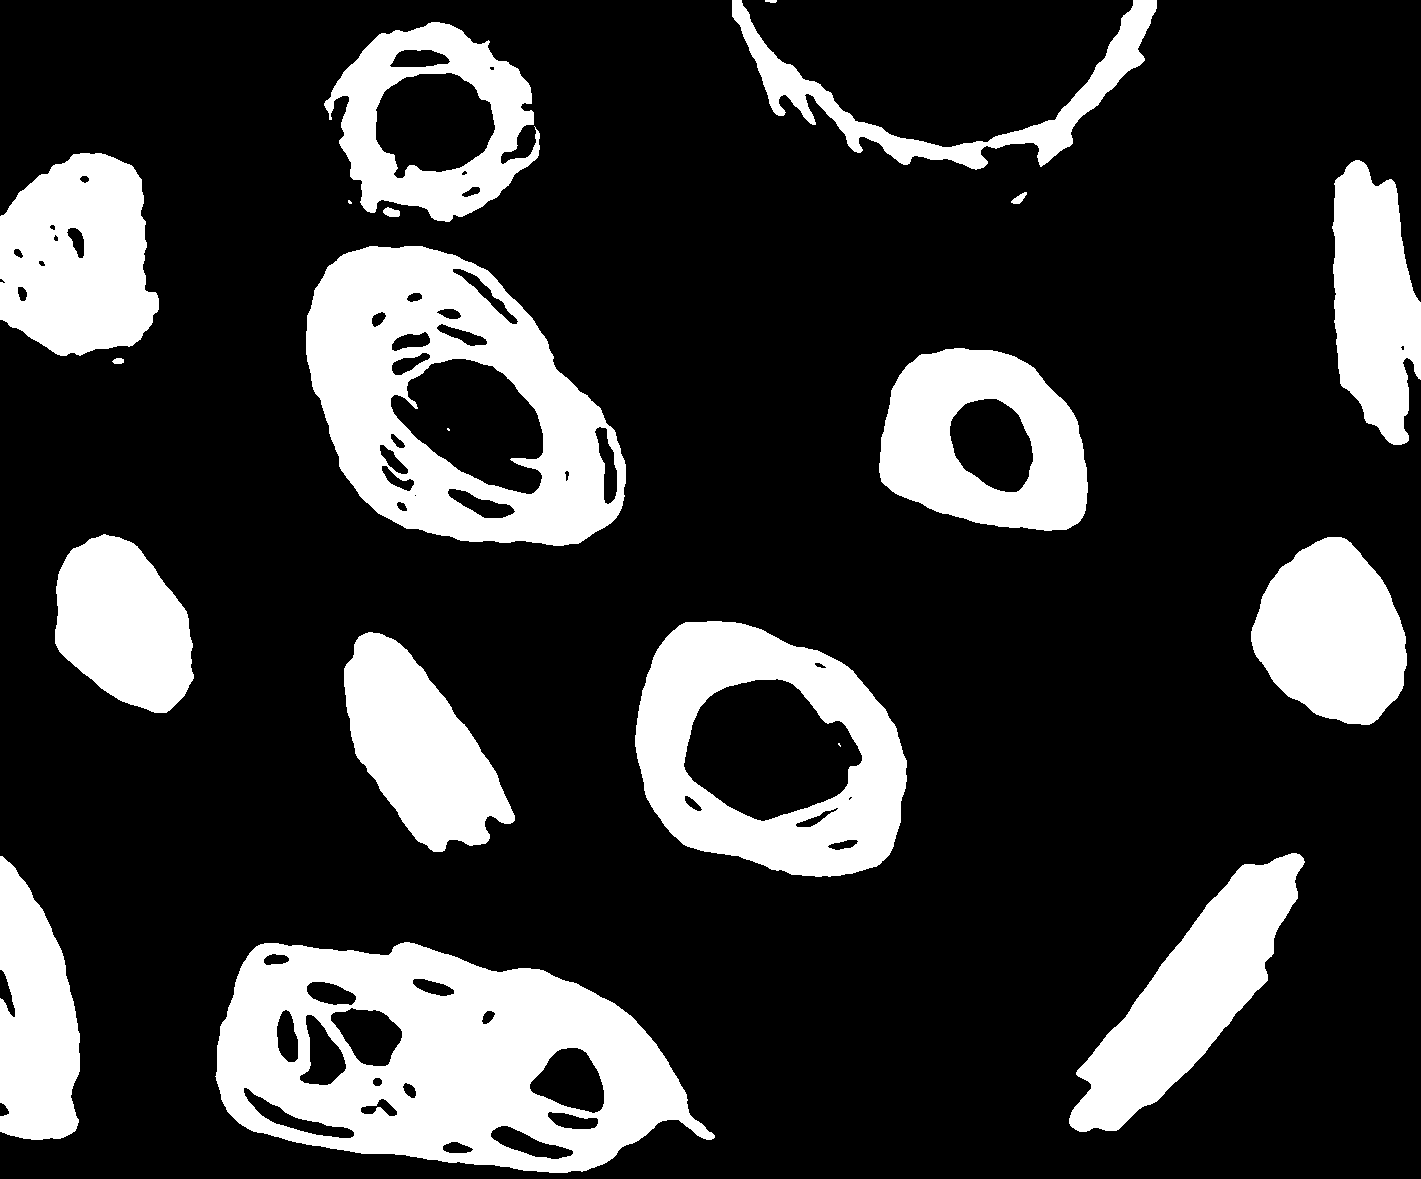

In [5]:
#pegando o negativo da imagem
img_final = 255 - blackAndWhiteimg
cv2_imshow(img_final)

só a critério informativo, é possível observar várias inconsistências na figura que foi gerada à mão, Se quisessemos diminuir ainda mais essas inconsistências seria possível dilatar as figuras para que elas absrovessem os objetos próximos que estão em escala muito menor. Entretanto, como o intuito final é contar os objetos, vamos manter mesmo os objetos pequeninos, incluindo os objetos dentro dos objetos já que no cotidiano o tipo de imagem que chega para os sistemas computacionais costuma possuir várias inconsistências por limitações de instrumento ou fatores externos.

Vamos reunir esse pré-processamento em uma função para que possamos usá-la posteriormente. E sem seguida iremos contar os objetos substituindo o módulo na coloração como tinhamos falado anteirormente.

In [6]:
import numpy as np
def pre_processamento(img:np.array)->np.array:
  '''
  descrição:
  a função aplica uma série de transformações na imagem para deixá-la em preto
  e branco e negativada em relação ao padrão, desde diminuir ruído a aplicação 
  de threshold.
  args:
    * img (numpy.array): recebe uma imagem com tipagem de numpy array
  return:
    * blackAndWhiteimg (numpy.array): retorna a imagem transformada em preto e 
    branco
  '''
  #fazemos uma cópia da imagem
  img2 = img.copy()
  # aplicamos um kernel de tamanho 15X15, com o valor do desvio padrão em x sendo 0 e em y também por consequência
  img2 = cv.GaussianBlur(img2,(15,15),0)
  #aplicamos o threshold para binarizar a imagem em 0 e 255, o limiar da binarização é o 127 e o valor máximo possível 255 
  (thresh, blackAndWhiteimg) = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)
  blackAndWhiteimg = 255 - blackAndWhiteimg
  return blackAndWhiteimg

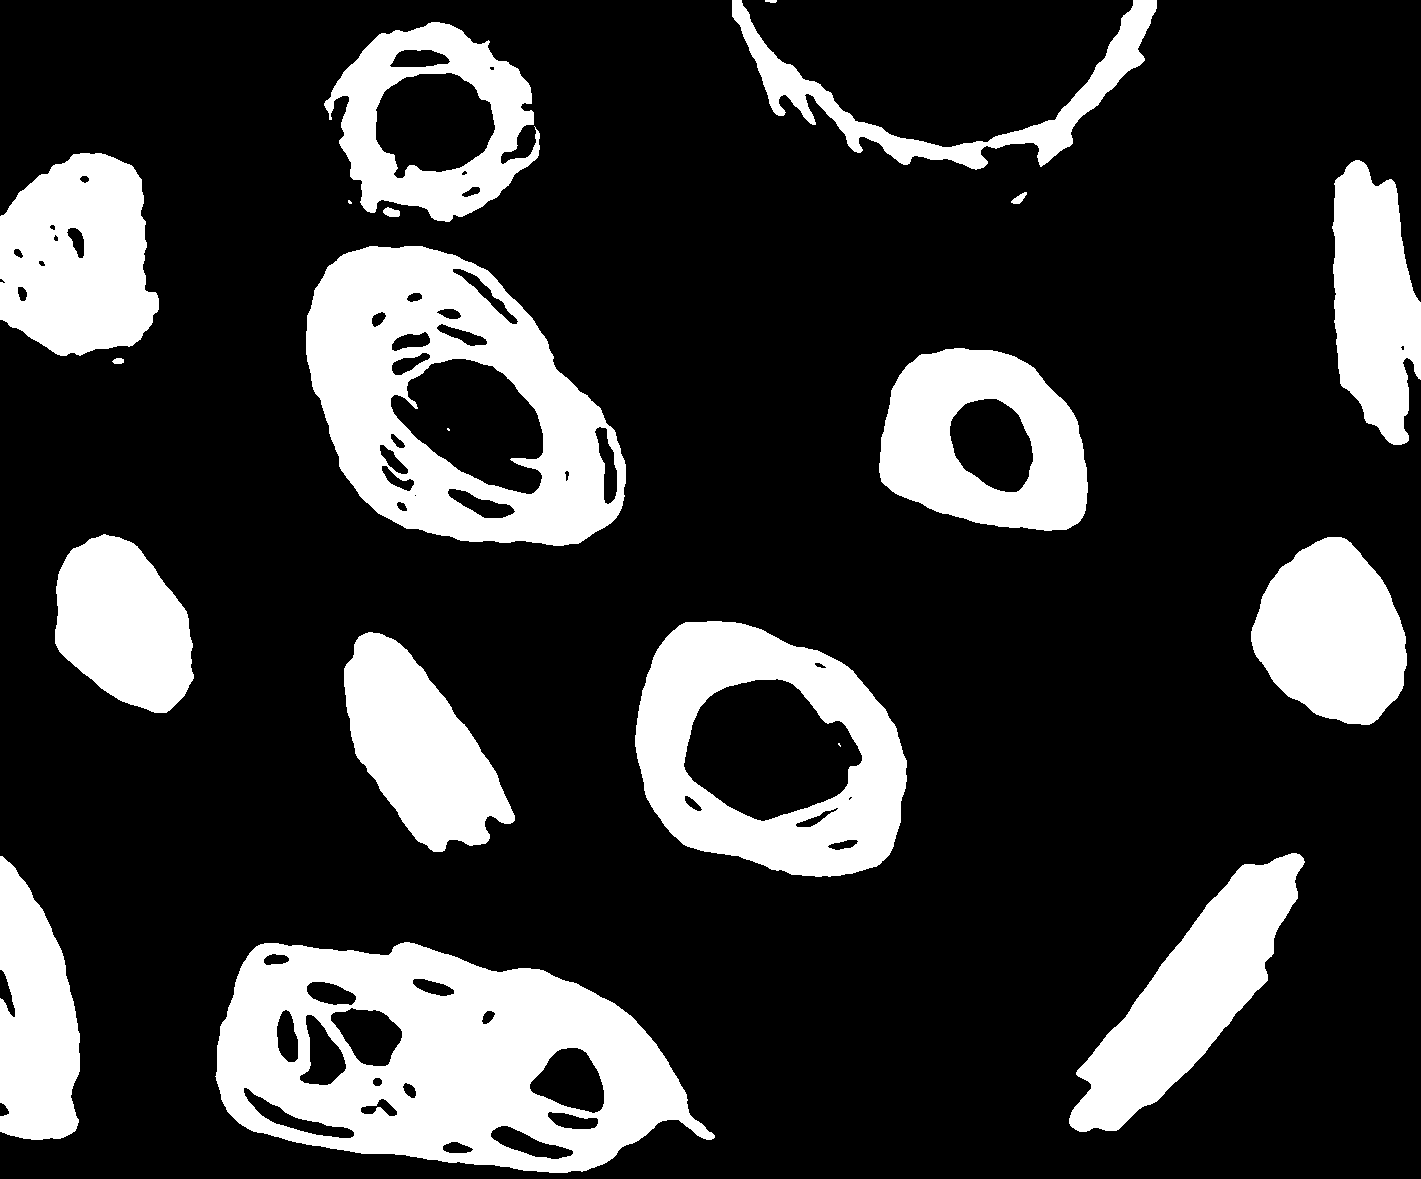

In [7]:
#testando a função
cv2_imshow(pre_processamento(img))

In [8]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

#Abrindo a imagem em tons de cinza
#try:
img = cv.imread('/content/bollhas.jpg',cv.IMREAD_GRAYSCALE)
#copiamos a imagem para não altera-la diretamente
img2 = pre_processamento(img)
width = len(img[0]) # quantidade de elementos em uma linha
heigth = len(img) # quantidade de linhas da imagem
n_objects = 0

h, w = img2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8) #o formato da saída com uma margem de dois píxels
for i in range(heigth): # percorremos um vetor indo de 0 ao valor de heigth
  for j in range(width): # percorremos um vetor indo de 0 ao valor de width
    if img2[i][j] == 255:
      point = (j,i)
      n_objects = n_objects+1
      if n_objects == 254: 
        color = 254
      else:
        color = int(n_objects%254) 
      
      result =cv.floodFill(img2,mask,point,color)
#except:  
#  print('ocorreu um erro durante a abertura da imagem, verifique o diretório')

21
68962


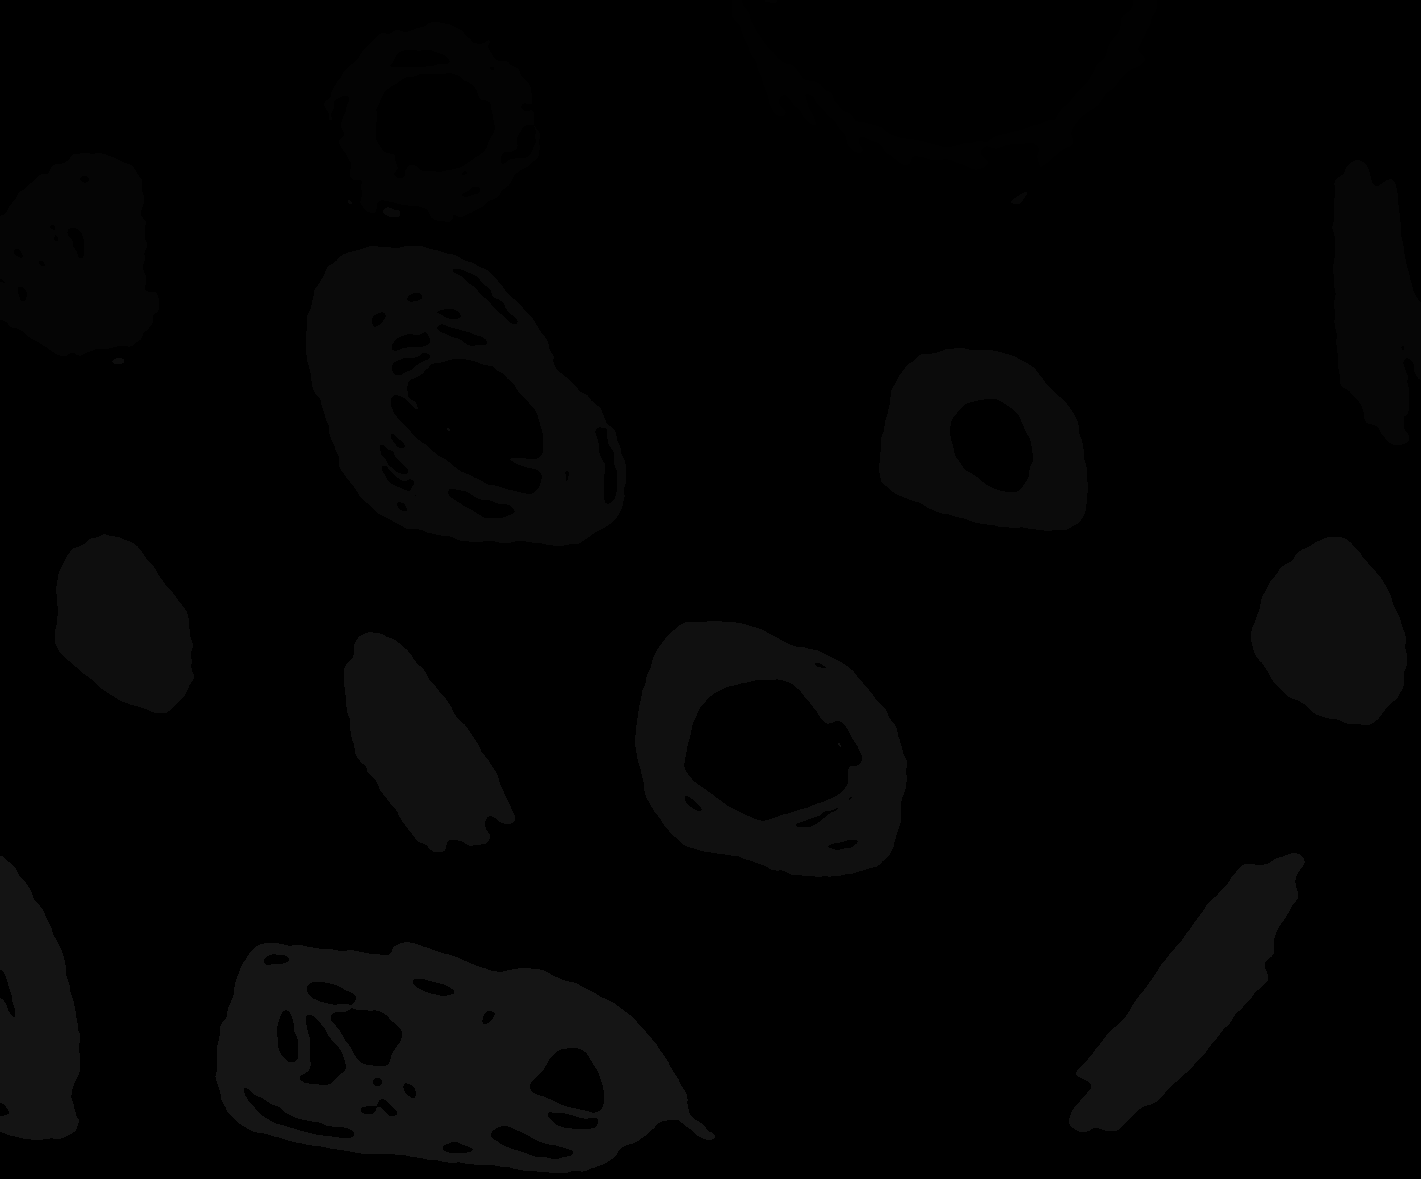

In [9]:
print(n_objects)
print(result[0])
cv2_imshow(result[1])

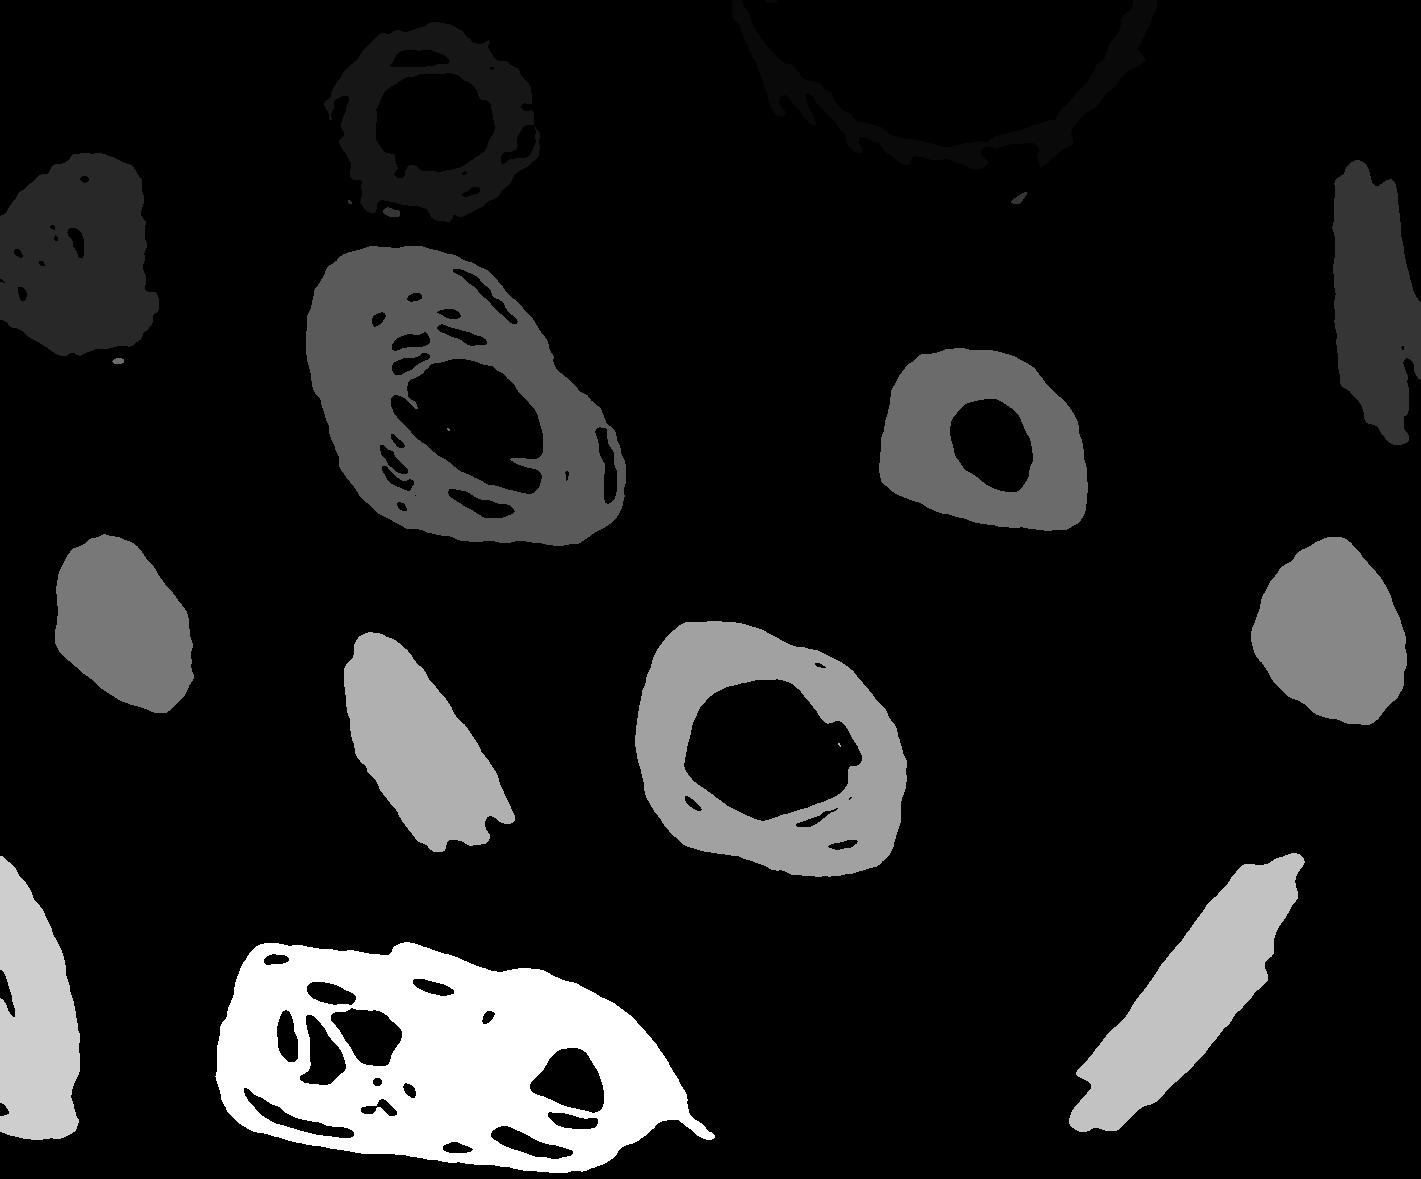

In [10]:
cv2_imshow(cv.equalizeHist(img2))

Se quisermos testar a condição de termos um número de objetos acima de 255 podemos simplesmente substituir o valor inicial de n_objects por um valor próximo a 255 e verificar o comportamento do algortimo. Agora, vamos para o exercício 3.2.

### Exercício 3.2
---
Esse exercício tem por objetivo aprimorar/modificar o código anterior para não contar elementos nas bordas e contar a quantidade elementos que possuem buracos em seu interior.

Uma possível solução para isso percorre os seguintes passos:
* percorrer as marges da figura e utilizar o floodfill para mudar a cor dos objetos que forem encontrados na margem para a mesma cor do fundo da imagem.
* continuar com o algoritmo para contar a quantidade de objetos que ão tocam na borda.
* como após a contagem não existem mais objetos brancos, alteramos a cor de fundo para branco.
* vamos extrair os objetos da figura e verificar se possuem elementos pretos como a cor inicial do fundo.

Iremos começar percorrendo a margem e "apagando" os objetos que tocam nela.

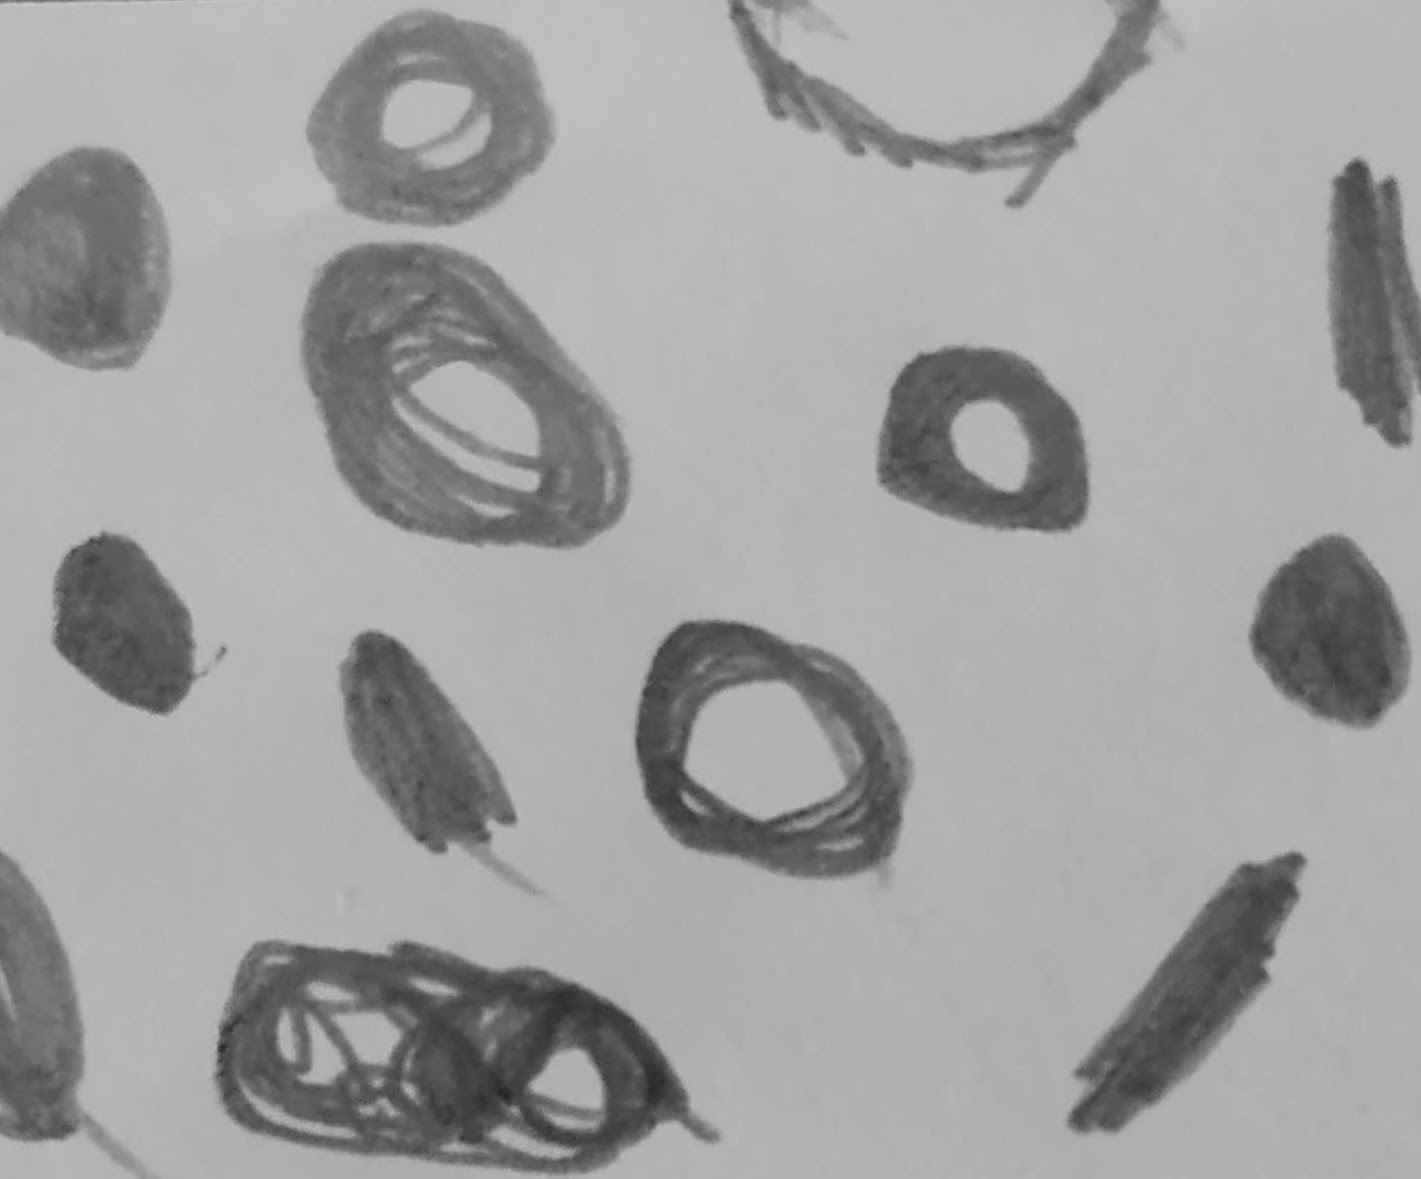

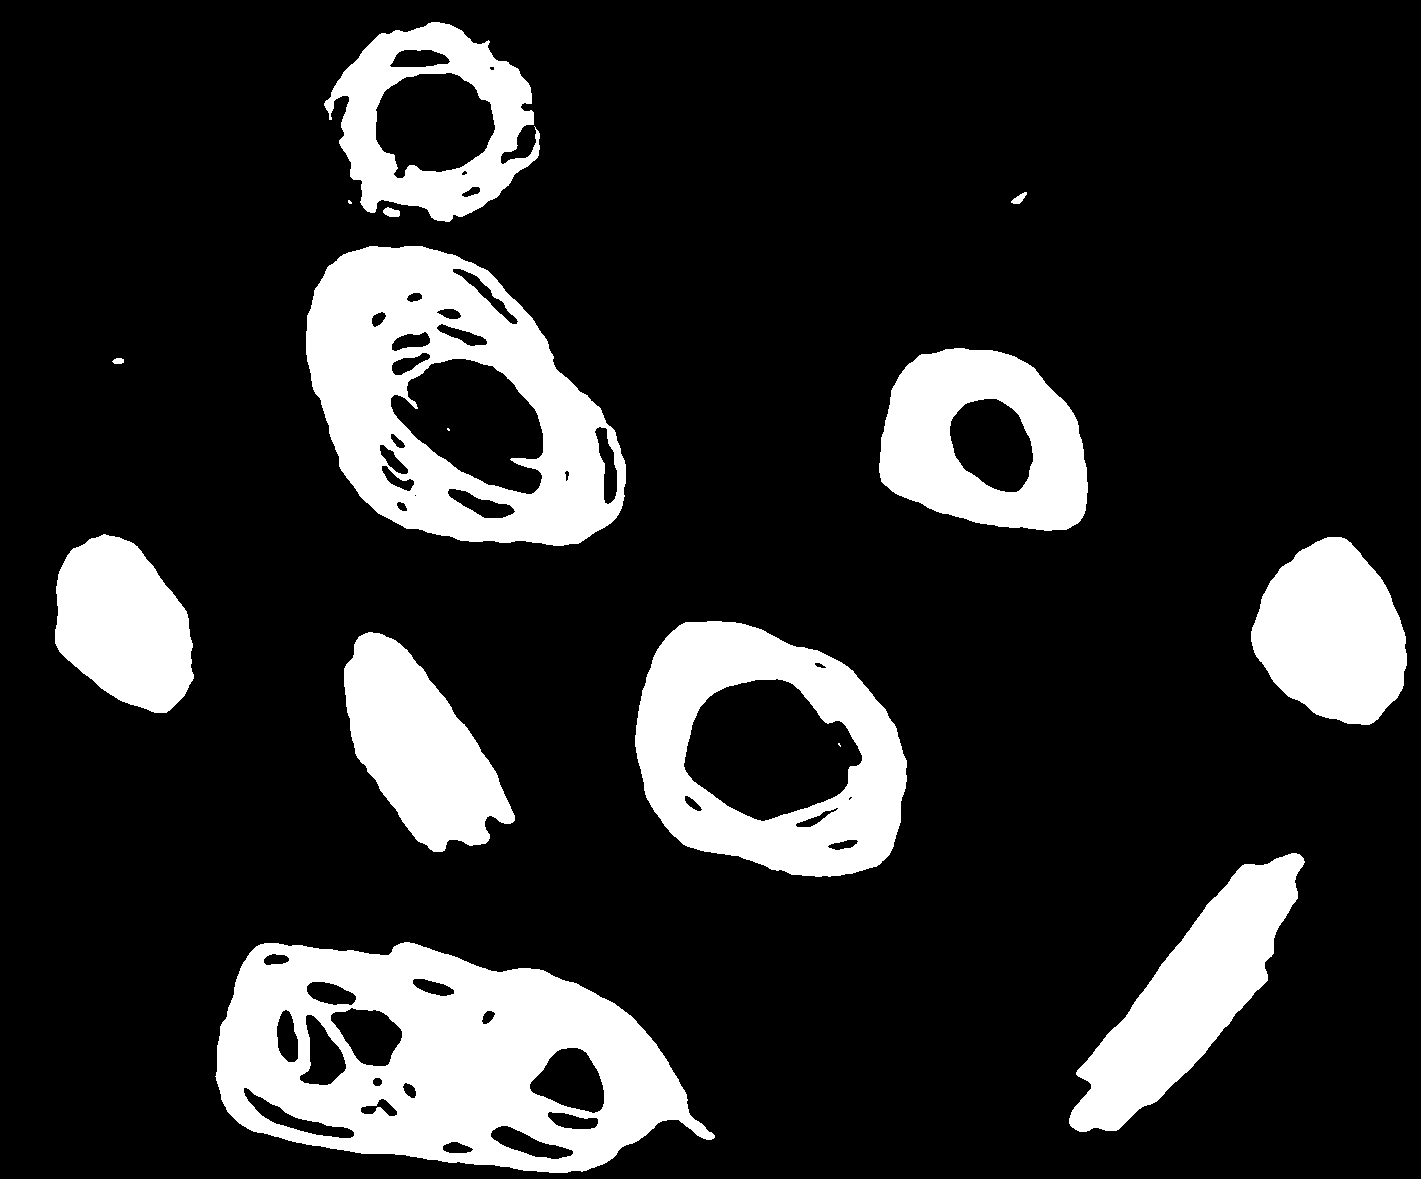

In [43]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

#Abrindo a imagem em tons de cinza
#try:
img = cv.imread('/content/bollhas.jpg',cv.IMREAD_GRAYSCALE)
#copiamos a imagem para não altera-la diretamente
img2 = pre_processamento(img)
width = len(img2[0]) # quantidade de elementos em uma linha
heigth = len(img2) # quantidade de linhas da imagem

h, w = img2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8) #o formato da saída com uma margem de dois píxels

for i in range(heigth):
  if img2[i][0] > 0:#verifica a margem esquerda da figura
    point = (0,i)
    color = 0
    result = cv.floodFill(img2,mask,point,0)
  if img2[i][-1] > 0:#verifica a margem direita da figura
    point = (width-1,i)
    color = 0
    result = cv.floodFill(img2,mask,point,0)
for j in range(width):#verifica a margem superior da figura
    if img2[0][j] > 0:
      point = (j,0)
      color = 0
      result = cv.floodFill(img2,mask,point,0)
    if img2[heigth-1][j] > 0:#verifica a margem inferior da figura
      point = (j,heigth-1)
      color = 0
      result = cv.floodFill(img2,mask,point,0)
cv2_imshow(img)
cv2_imshow(img2)

Agora que eliminamos os elementos nas margens da figura, o próximo passo será, contar os elementos mudando suas cores como anteriormente 

In [44]:
n_objects = 0

h, w = img2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8) #o formato da saída com uma margem de dois píxels
for i in range(heigth): # percorremos um vetor indo de 0 ao valor de heigth
  for j in range(width): # percorremos um vetor indo de 0 ao valor de width
    if img2[i][j] == 255:
      point = (j,i)
      n_objects = n_objects+1
      if n_objects == 254: 
        color = 254
      else:
        color = int(n_objects%254) 
      
      result =cv.floodFill(img2,mask,point,color)

16


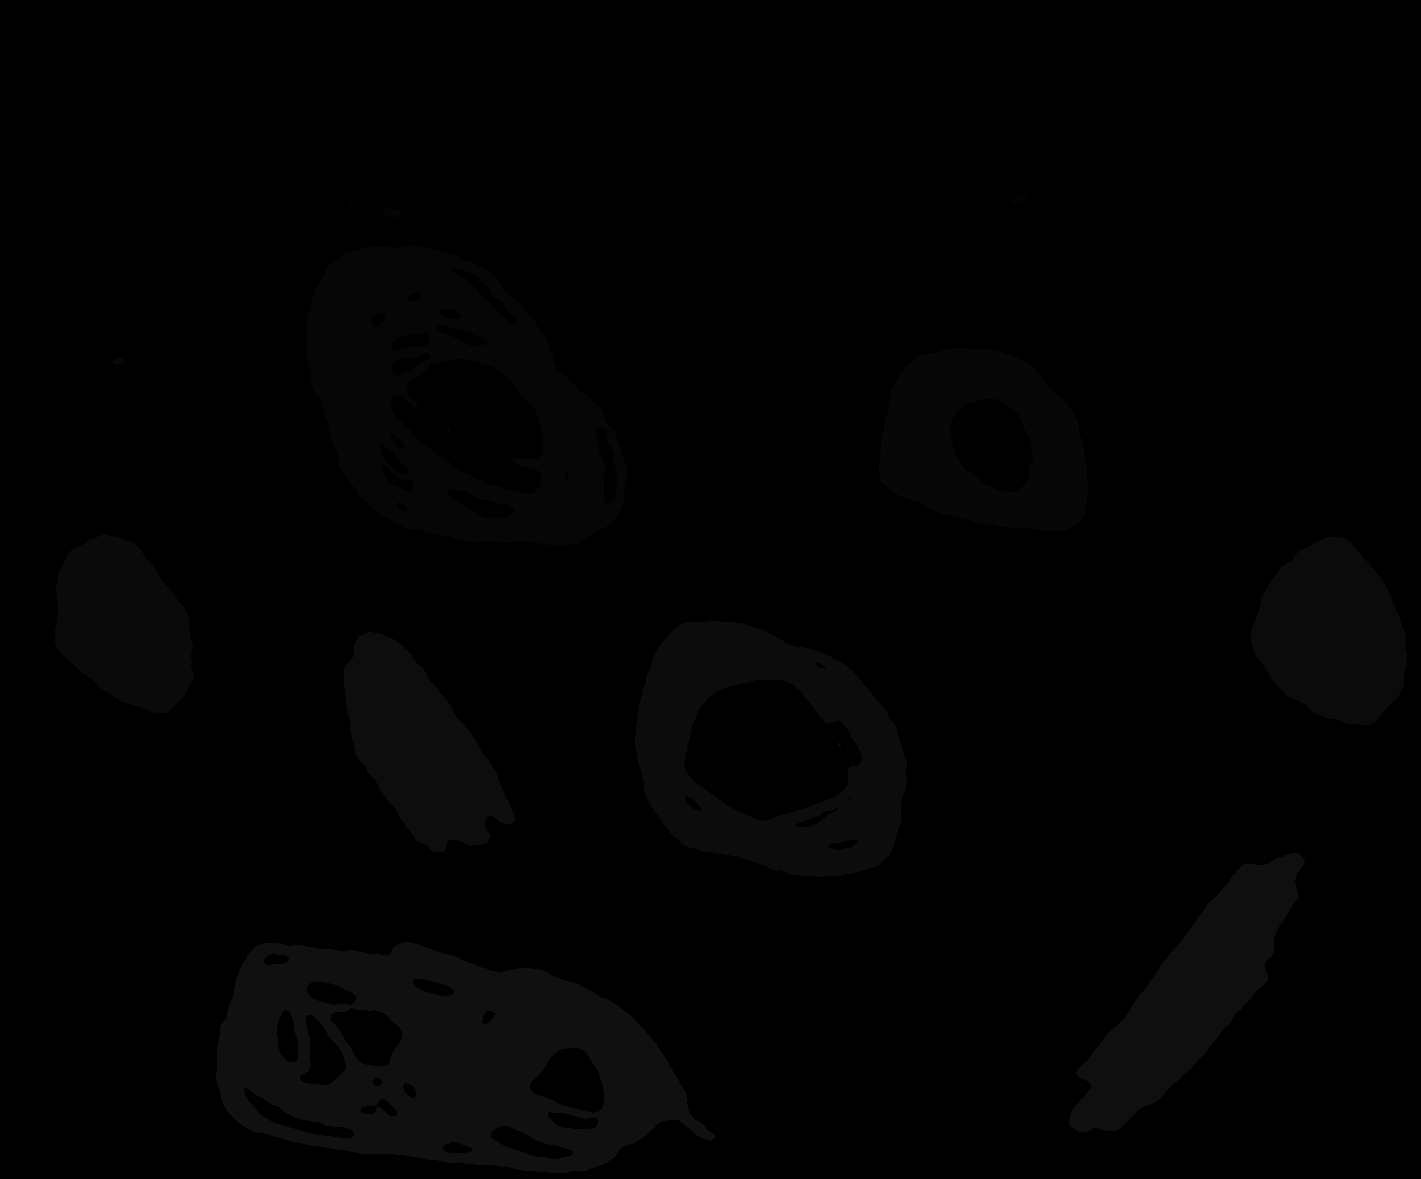

In [45]:
print(n_objects)
cv2_imshow(img2)

Essa parte é relativamente nova para esses exercícios,utilizaremos uma função chamada cv.findContours para esboçar o contorno das imagens e em seguida vamos utilizar a função boundrect para delimitar a área de um objeto, vamos remover objetos dentro de objetos e por fim, contar se há buracos no objeto.

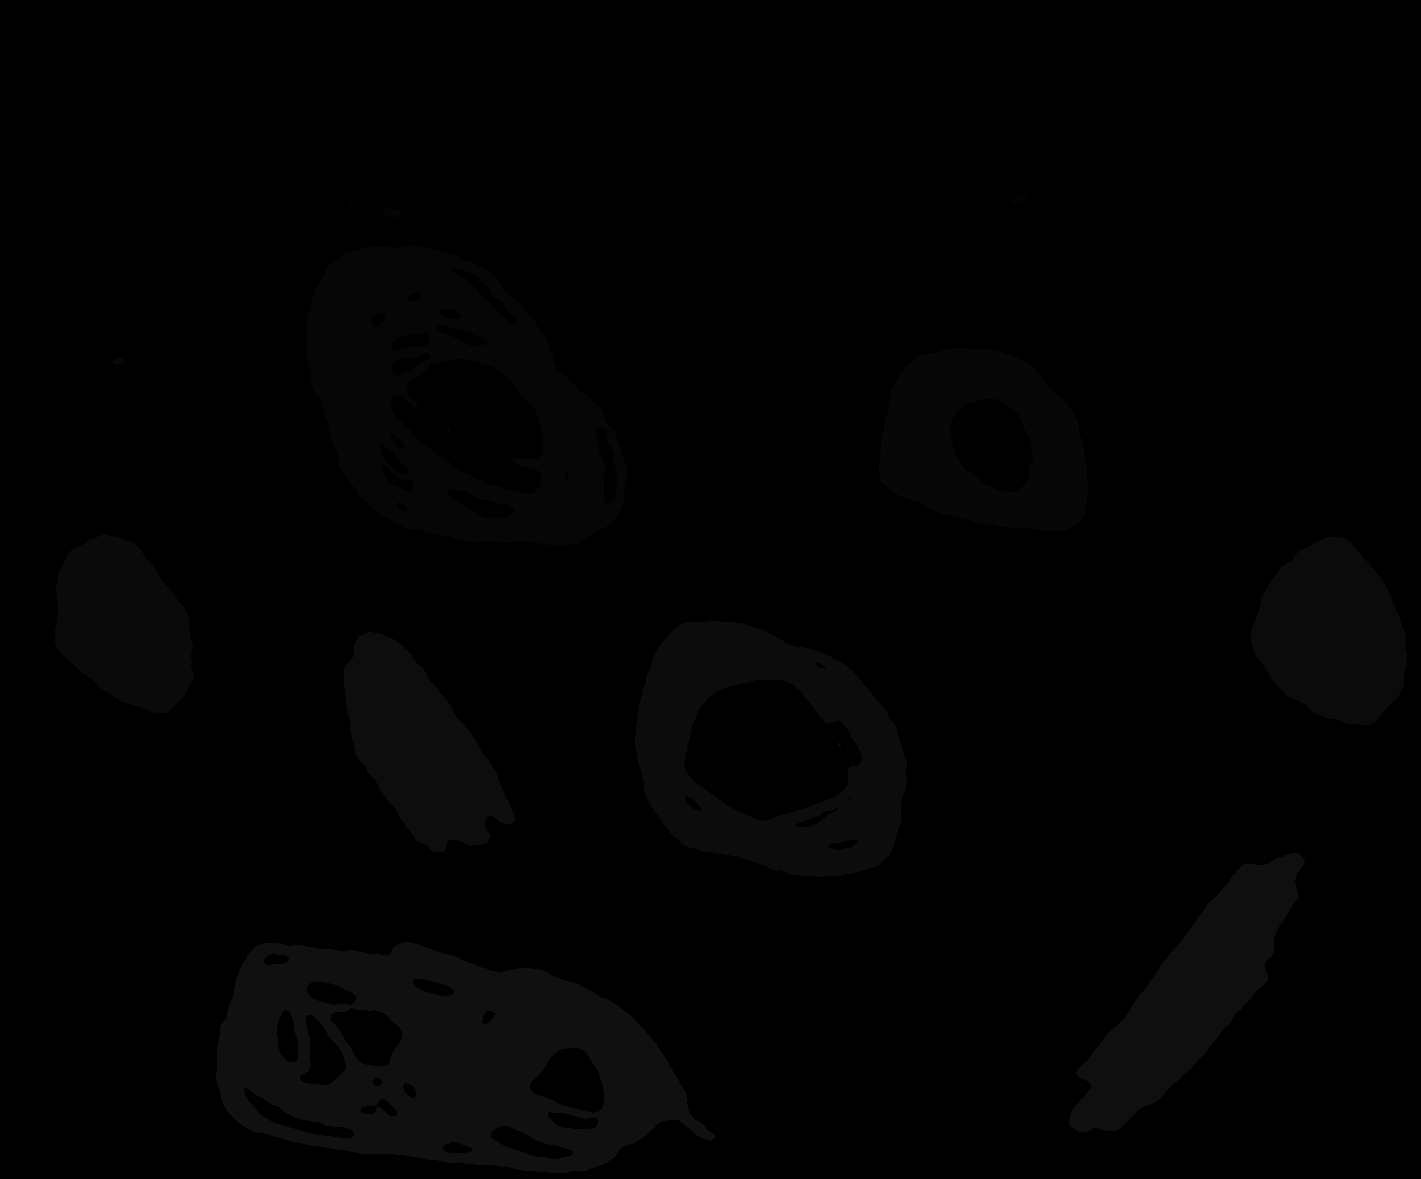

In [66]:
img3 = img2.copy()

cv2_imshow(img3)

In [67]:
#Vamos tentar encontrar os contornos das figuras
contours, hierarchy = cv.findContours(img3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#RETR_EXTERNAL recupera somente contornos externos ao objeto e CHAIN_APPROX_SIMPLE faz uma aproximação linear dos pontos de contorno

#inicializamos os vetores que vão armazenar a curva do contorno e as bound boxes
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    #encontra uma forma de 3 pontos que melhor aproxime o formato da figura fechada que analisamos
    boundRect[i] = cv.boundingRect(contours_poly[i])
    #utiliza os pontos da função aproximadora anterior para delimitar as extenções do objeto

In [68]:
len(contours)

13

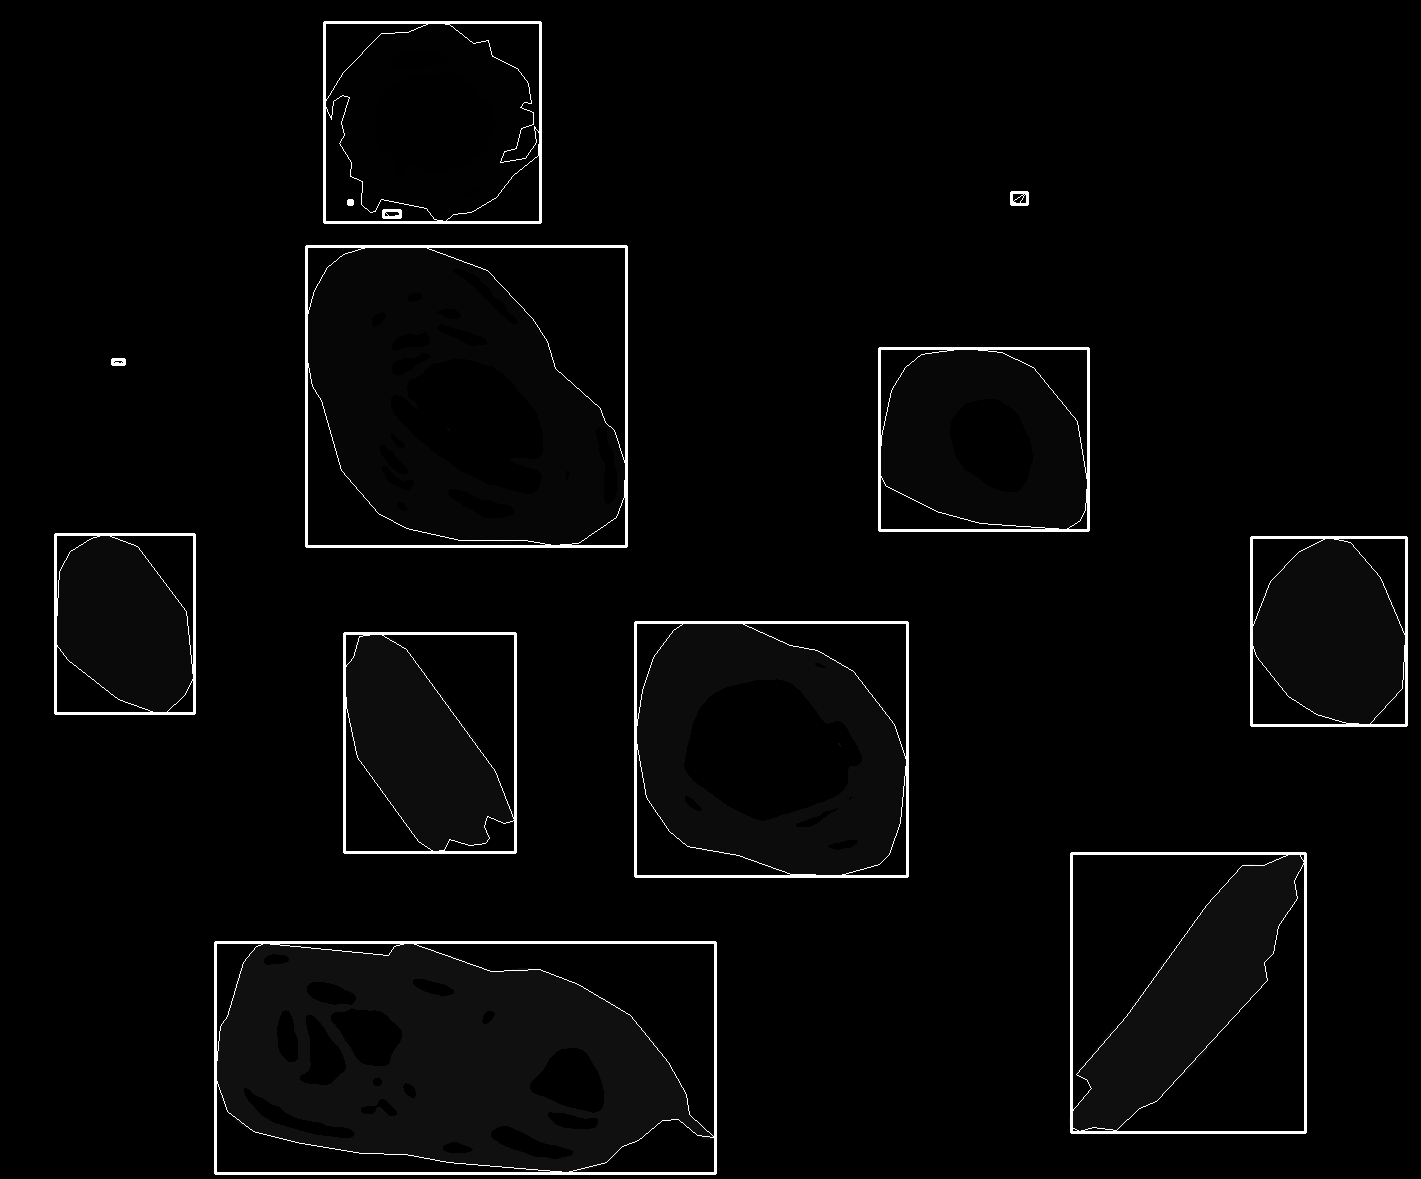

In [69]:
for i in range(len(contours)):
    color = (255,0,0)#(rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(img3, contours_poly, i, color)
    cv.rectangle(img3, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    
cv2_imshow(img3)

In [36]:
img3

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Agora que encontramos o contorno das figuras e suas bounding boxes vamos utilizar as bounding boxes para extrair os objetos da figura 2 e posteriormente verificar figura por figura se existem pixels pretos no seu interior. vamos finalmente tornar o fundo da imagem 2 igual a branco já que não precisamos mais fazer a análise de contorno no momento. É importante salientar que o retorno da bounding boxes são 4 parâmetros:
(x0,y0,dx,dy) que representam as coordenadas iniciais do retângulo (x0,y0), a largura da figura como dx e a altura como dy. 

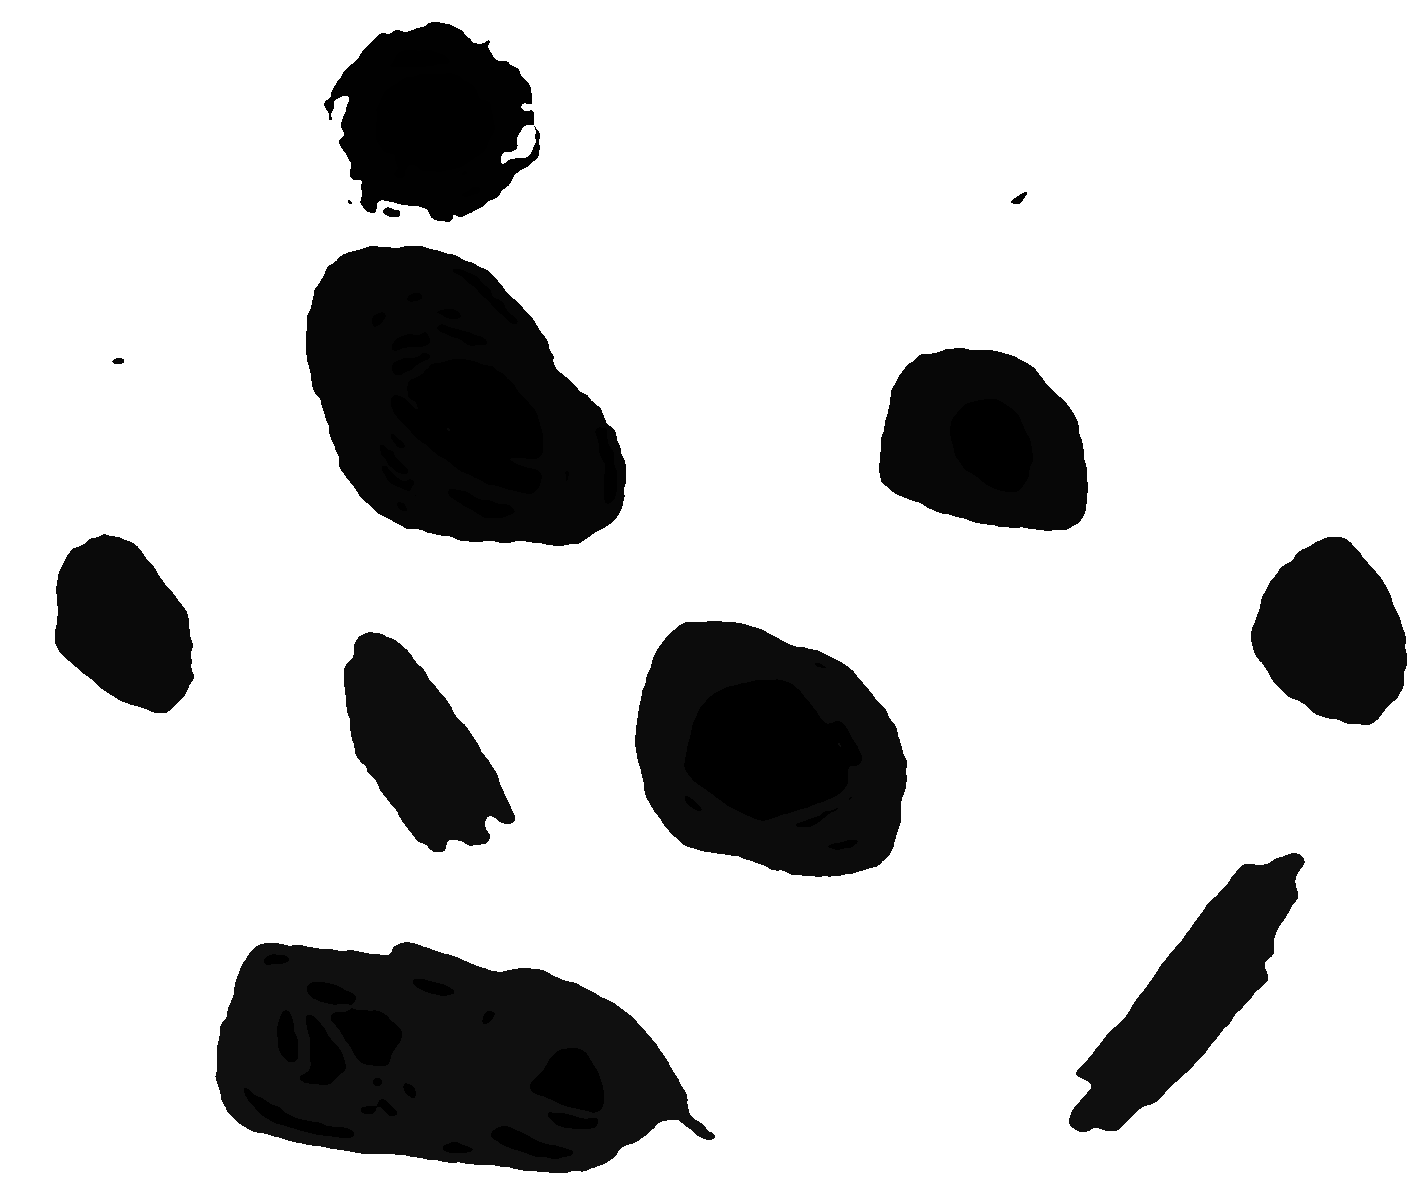

In [70]:
img4 = img2.copy()
h, w = img4.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv.floodFill(img4,mask,(0,0),255)
cv2_imshow(img4)

In [72]:
objects = []
for i in boundRect:
  #print(str(i[0])+'\n')
  objects.append(img4[i[1]:(i[1]+i[3]),i[0]:i[0]+i[2]])

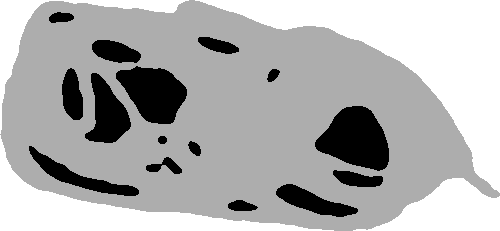

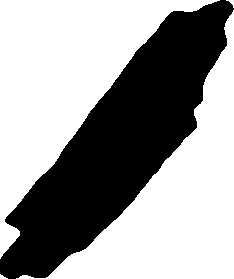

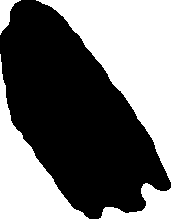

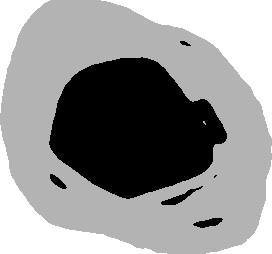

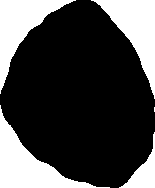

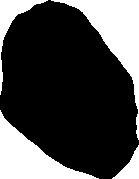

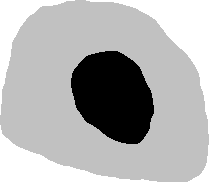

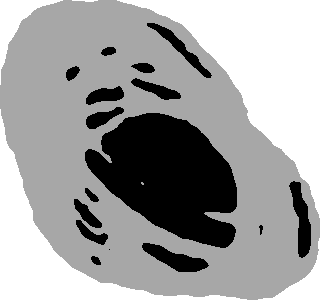

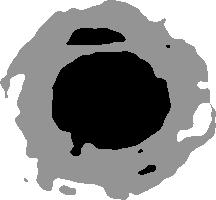

In [80]:
for obj in objects:
  #cv2_imshow(obj)
  #Vamos exibir a imagem com o histograma equalizado para evidenciar as que tem buracos
  cv2_imshow(cv.equalizeHist(obj))

Agora que já extraímos os objetos de interesse da imagem, vamos verificar em quantas delas ainda tem pontos pretos, que agora representam somente os buracos das figuras e não mais a cor de fundo.

In [79]:
count_roles = 0
for obj in objects:
  if 0 in obj:
    count_roles = count_roles + 1
  
print(count_roles)

5


Pontos importantes a serem levados em consideração sobre o método aplicado é: 
* Na busca por contornos, objetos muito pequenos internos de outros objetos acabaram sendo tratados como ruído e foram eliminados da contagem, isso devido à escolha de parâmetros do contorno evidenciando somente os objetos exteriores. Isso pode ser alterado com algumas modificações no código mas não é o foco dessa resposta.
* Outro ponto importante é que provavelmente existam métodos mais fáceis de contar os objetos que possuem buracos, entretanto a utilização dos contornos em evidência junto com as bounding boxes estão alinhadas com as práticas de extração de regiões de interesse de figuras(ROI), e por isso a questão se desenvolveu nessa abordagem de extrair os objetos da figura para contar quantas tinham buracos. 

Abaixo iremos juntar todo o código dessa prática:

In [82]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

#Abrindo a imagem em tons de cinza
#try:
img = cv.imread('/content/bollhas.jpg',cv.IMREAD_GRAYSCALE)
#copiamos a imagem para não altera-la diretamente
img2 = pre_processamento(img)
width = len(img2[0]) # quantidade de elementos em uma linha
heigth = len(img2) # quantidade de linhas da imagem

h, w = img2.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8) #o formato da saída com uma margem de dois píxels

for i in range(heigth):
  if img2[i][0] > 0:#verifica a margem esquerda da figura
    point = (0,i)
    color = 0
    result = cv.floodFill(img2,mask,point,0)
  if img2[i][-1] > 0:#verifica a margem direita da figura
    point = (width-1,i)
    color = 0
    result = cv.floodFill(img2,mask,point,0)
for j in range(width):#verifica a margem superior da figura
    if img2[0][j] > 0:
      point = (j,0)
      color = 0
      result = cv.floodFill(img2,mask,point,0)
    if img2[heigth-1][j] > 0:#verifica a margem inferior da figura
      point = (j,heigth-1)
      color = 0
      result = cv.floodFill(img2,mask,point,0)

n_objects = 0

for i in range(heigth): # percorremos um vetor indo de 0 ao valor de heigth
  for j in range(width): # percorremos um vetor indo de 0 ao valor de width
    if img2[i][j] == 255:
      point = (j,i)
      n_objects = n_objects+1
      if n_objects == 254: 
        color = 254
      else:
        color = int(n_objects%254) 
      
      result =cv.floodFill(img2,mask,point,color)

img3 = img2.copy()
#Vamos tentar encontrar os contornos das figuras
contours, hierarchy = cv.findContours(img3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#RETR_EXTERNAL recupera somente contornos externos ao objeto e CHAIN_APPROX_SIMPLE faz uma aproximação linear dos pontos de contorno

#inicializamos os vetores que vão armazenar a curva do contorno e as bound boxes
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    #encontra uma forma de 3 pontos que melhor aproxime o formato da figura fechada que analisamos
    boundRect[i] = cv.boundingRect(contours_poly[i])
    #utiliza os pontos da função aproximadora anterior para delimitar as extenções do objeto
del img3

img4 = img2.copy()
#colorindo o background de branco
cv.floodFill(img4,mask,(0,0),255)

#extraindo os objetos
objects = []
for i in boundRect:
  #print(str(i[0])+'\n')
  objects.append(img4[i[1]:(i[1]+i[3]),i[0]:i[0]+i[2]])
#deletando as cópias de img que não precisamos mais
del img4
del img2
#contando os objetos esburacados
count_roles = 0
for obj in objects:
  if 0 in obj:
    count_roles = count_roles + 1
  
print(count_roles)

5
